# The World of Embeddings 📣

##### Author : Deepak John Reji 
https://www.youtube.com/channel/UCgOwsx5injeaB_TKGsVD5GQ

Linked In: https://www.linkedin.com/in/deepak-john-reji/

A very basic definition of a word embedding is a real number, vector representation of a word. Typically, these days, words with similar meaning will have vector representations that are close together in the embedding space (though this has not always been the case).

When constructing a word embedding space, typically the goal is to capture some sort of relationship in that space, be it meaning, morphology, context, or some other kind of relationship.

By encoding word embeddings in a densely populated space, we can represent words numerically in a way that captures them in vectors that have tens or hundreds of dimensions instead of millions (like one-hot encoded vectors).

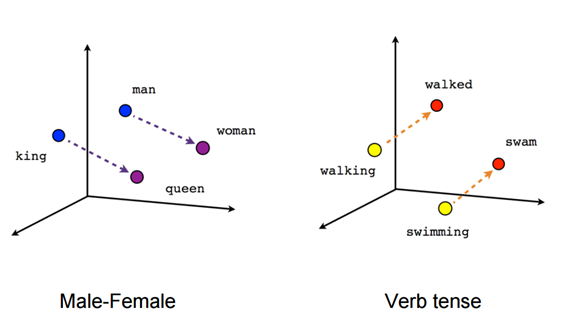

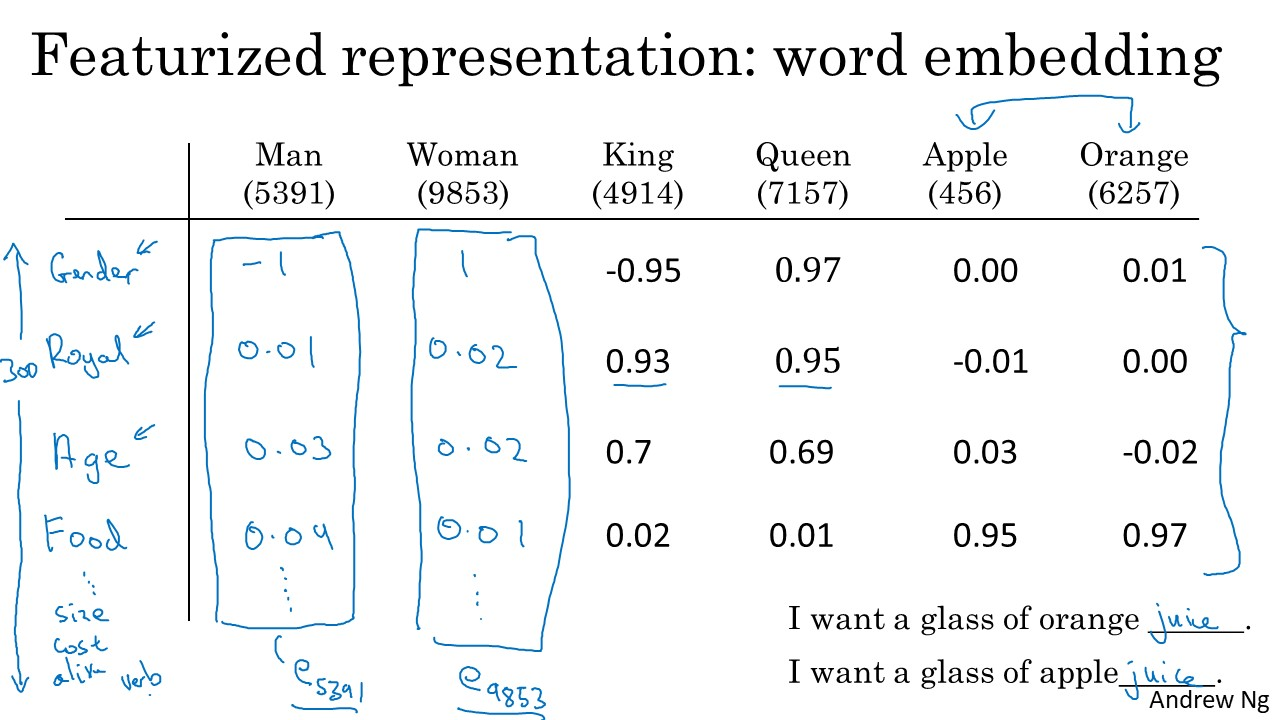

## What are Sentence embeddings?


Sentence-level representations are necessary for various NLP tasks. Recurrent neural networks have proven to be very effective in learning distributed representations and can be trained efficiently on natural language inference tasks. Sentence embeddings embeds a full sentence into a vector space. They retain some nice properties, as they inherit features from their underlying word embeddings.


## DistilBERT

The DistilBERT model was proposed in the blog post Smaller, faster, cheaper, lighter: Introducing DistilBERT, a distilled version of BERT, and the paper DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. DistilBERT is a small, fast, cheap and light Transformer model trained by distilling BERT base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

### Background

BERT (Devlin et al., 2018) and RoBERTa (Liu et al., 2019) has set a new state-of-the-art performance on sentence-pair regression tasks like semantic textual similarity (STS). However, it requires that both sentences are fed into the network, which causes a massive computational overhead: Finding the most similar pair in a collection of 10,000 sentences requires about 50 million inference computations (~65 hours) with BERT. The construction of BERT makes it unsuitable for semantic similarity search as well as for unsupervised tasks like clustering.

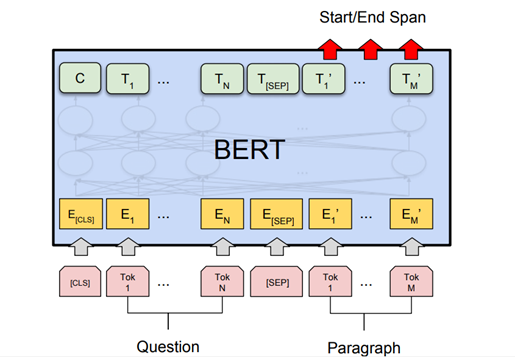

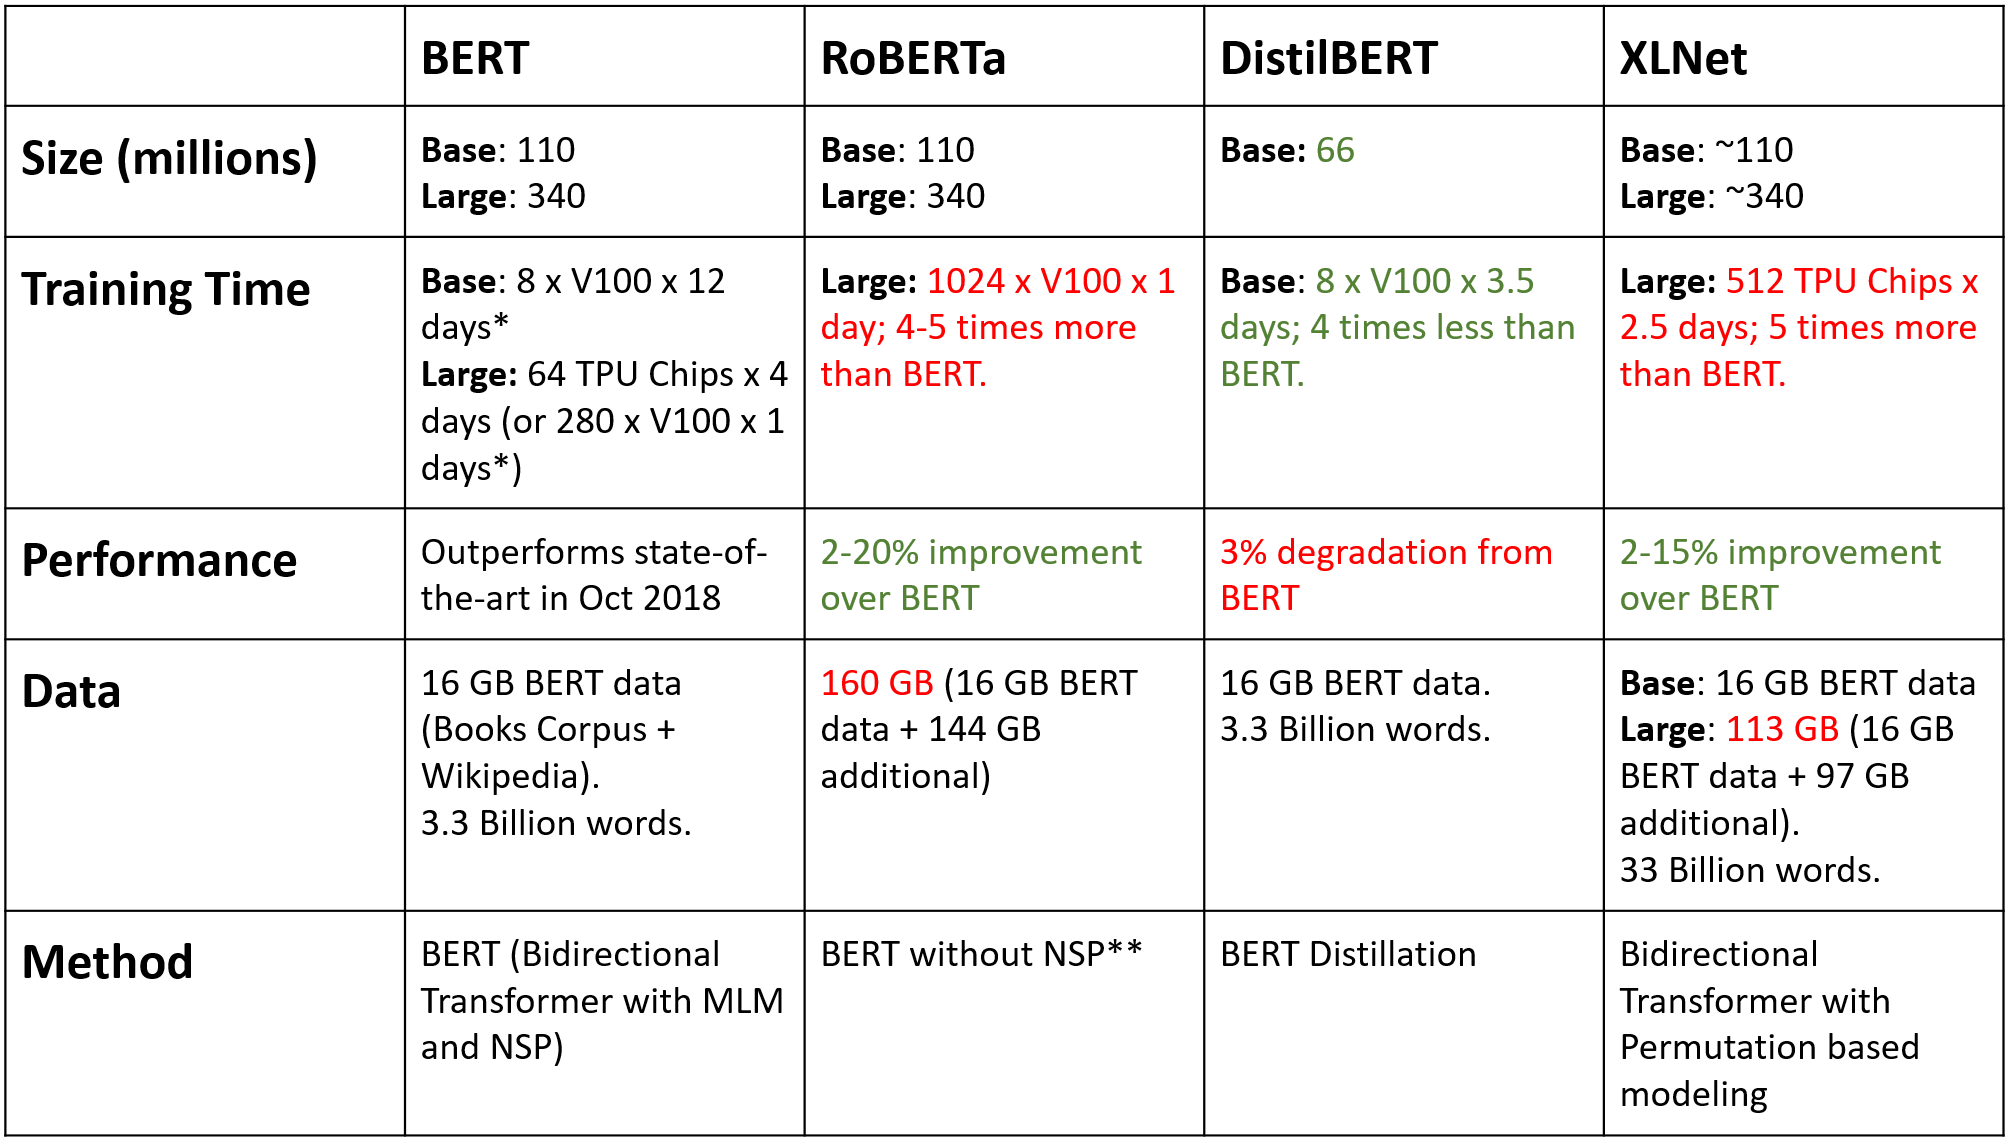



## Semantic Search Implementation using DistilBert

#### Loading the Packages

In [4]:
import os
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

#### Loading the Data

In [2]:
os.chdir(r'C:\Users\rejid4996\OneDrive - ARCADIS\Arcadis Files\Project Files\Personal Projects\search query')
df = pd.read_excel('Marvel Datastore.xlsx')
df.head()

,Sentences
0,"Thor Odinson is the Asgardian God of Thunder, ..."
1,"Upon being welcomed back to Asgard as a hero, ..."
2,Thor returned to Asgard having defeated his br...
3,Loki Laufeyson was the biological son of Laufe...
4,"Transported by the wormhole to Sanctuary, Loki..."


#### Now how to do Semantic Search

The logic is pretty simple, we just have to embed the search word and compare against the embedding of all the sentences. For comparing or checking the similarity we use a metric called Cosine Similarity. 

####  Cosine similarity

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction.

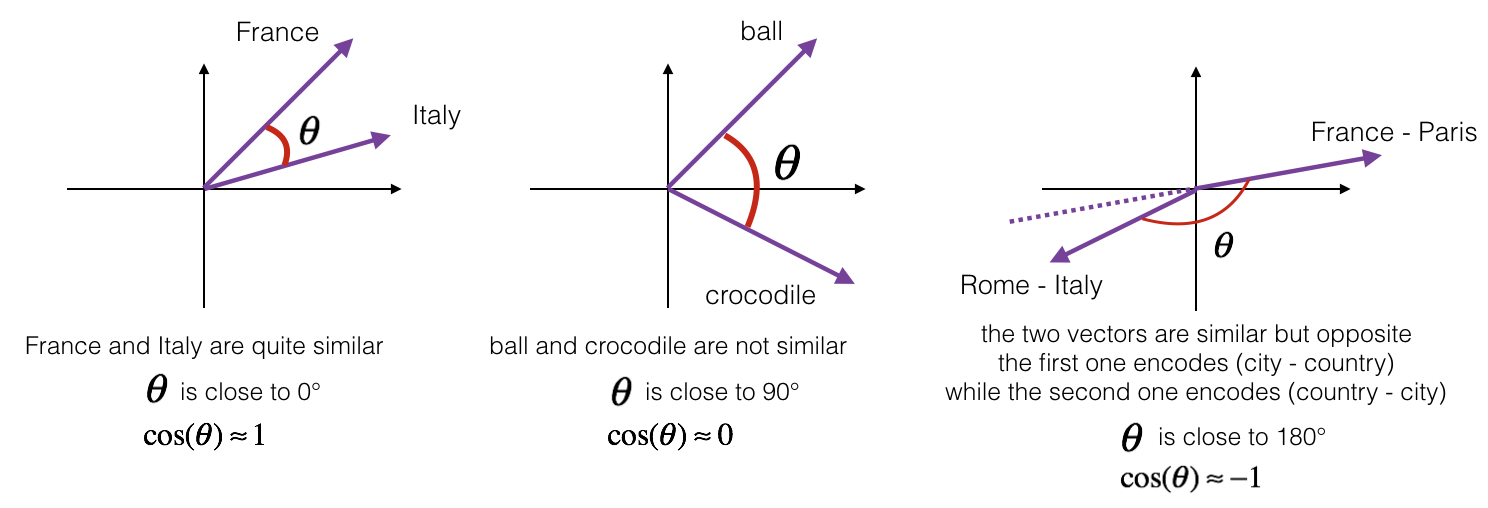

#### Write a similarity function using Cosine similarity

In [15]:
def find_similar(vector_representation, all_representations, k=1):
    similarity_matrix = cosine_similarity(vector_representation, all_representations)
    np.fill_diagonal(similarity_matrix, 0)
    similarities = similarity_matrix[0]
    if k == 1:
        return [np.argmax(similarities)]
    elif k is not None:
        return np.flip(similarities.argsort()[-k:][::1])

Let's see how this is working in the backend

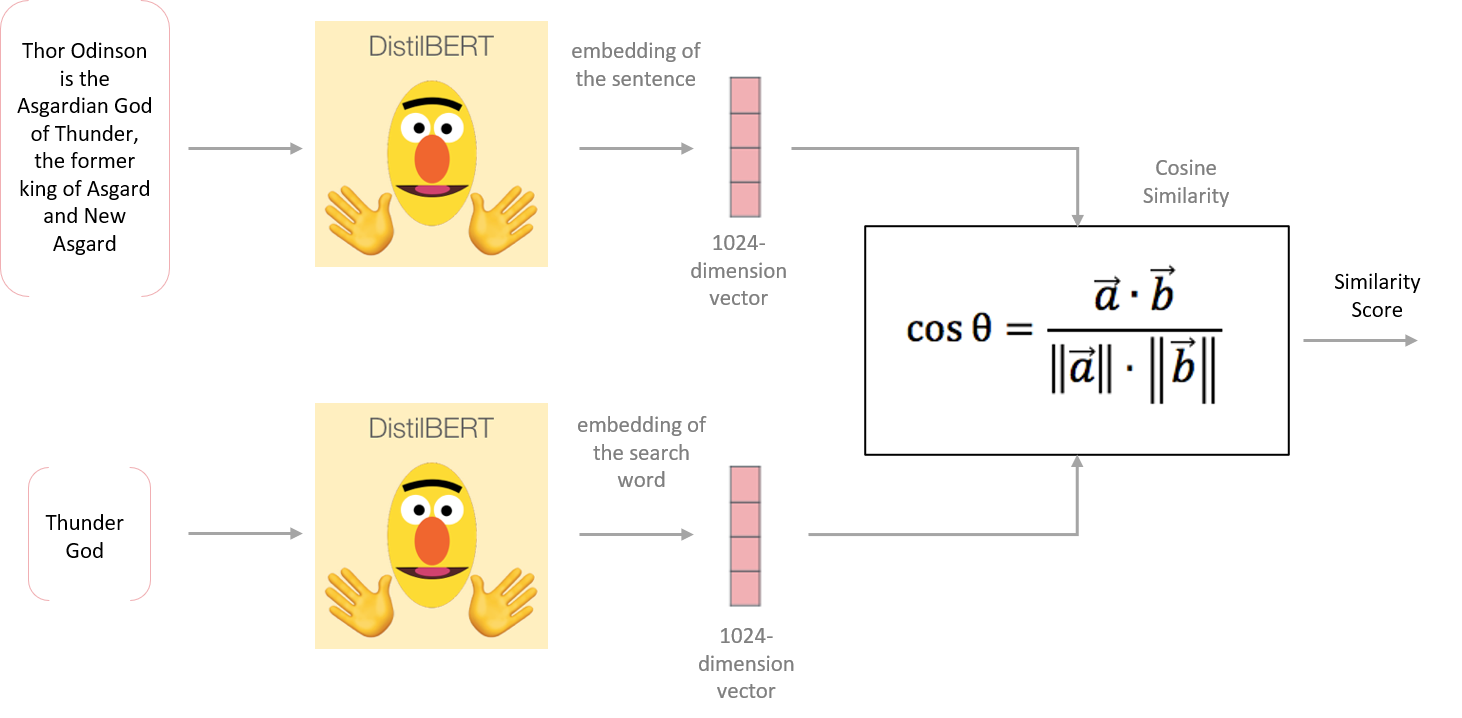

#### Step-1, Let's embed the data(sentences/paragraphs) using DistilBert!!! Its straightforward and fast using sentence_transformers

In [16]:
paragraph = df.iloc[:, 0] # the first column values
embeddings_distilbert = model.encode(paragraph.values)

In [20]:
embeddings_distilbert[0]

array([-5.10572374e-01,  2.37482592e-01, -3.17570865e-01,  1.72642410e-01,
       -6.02683604e-01, -7.63729662e-02,  9.72798109e-01, -7.34047592e-02,
        2.15107128e-01, -5.35016119e-01, -5.48609078e-01,  4.11734581e-01,
       -6.30872771e-02,  4.24397051e-01, -3.34447145e-01, -2.39114150e-01,
        8.92470032e-02,  8.09626818e-01, -9.25360024e-01,  1.94118172e-01,
       -1.02933452e-01,  5.77059209e-01, -6.35224581e-01, -3.56013387e-01,
        3.95561725e-01,  1.50916725e-01, -5.72075732e-02,  1.85729325e-01,
        3.45323294e-01,  3.43072951e-01, -3.90266091e-01,  6.89741876e-03,
        5.22479594e-01, -3.50283623e-01,  9.03046727e-02,  2.72742391e-01,
       -7.85464823e-01, -2.58406669e-01,  1.72644481e-01,  6.16499901e-01,
        9.46998239e-01, -5.90578258e-01,  1.75679192e-01,  1.58952877e-01,
       -6.04104102e-01, -9.99690741e-02, -1.76251054e-01, -1.34312138e-01,
        1.62526146e-01,  4.29172069e-01, -1.88258871e-01, -1.65024474e-01,
       -2.48772278e-01, -

In [17]:
embeddings_distilbert[0].shape

(768,)

#### Step-2, Now we have to embed our search query

In [37]:
search_string = "thor's weapon"
search_vect = model.encode([search_string])

In [38]:
search_vect[0].shape

(768,)

#### Step-3, now find the similarity between vectors using cosine similarity function

In [39]:
K = 3 # no. of paragraphs that has to be extracted
distilbert_similar_indexes = find_similar(search_vect, embeddings_distilbert, K)

In [40]:
distilbert_similar_indexes

array([ 7,  6, 13], dtype=int64)

#### Now lets structure our output

In [41]:
output_data = []
for index in distilbert_similar_indexes:
    output_data.append(paragraph[index])

In [42]:
output_data[0]

'Stormbreaker is an enchanted axe used by Thor. It was forged from Uru on Nidavellir, and can summon the Bifrost.'

## Yessss!!! we made it 😀😀😀

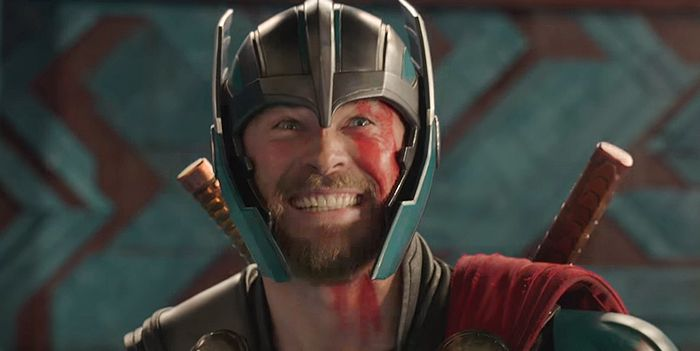